In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [18]:
# plt.rc('font', family='serif', serif='Times')
# plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

In [19]:
# dict_file = './results/test_results.npy'
# remove_keys = ['csense_t24_random-ddpg_ep_g1e2-original-914']

# dictionary = np.load(dict_file,allow_pickle='TRUE').item()
# for key in remove_keys:
#     if key in dictionary:
#         del dictionary[keys]
# np.save(dict_file,dictionary) 

In [20]:
train_results = np.load('./results/all_train_results.npy',allow_pickle='TRUE').item()
test_results = np.load('./results/all_test_results.npy',allow_pickle='TRUE').item()

In [21]:
# results = train_results
results = test_results

In [22]:
file = 'seedlist.dat'
with open(file) as f:
    seed_list = []
    for line in f: # read rest of lines
        seed_list.append([int(x) for x in line.split()][0])

In [23]:
experiment_list = list(results.keys())
location_list   = list(results[experiment_list[0]][seed_list[0]].keys())
year_list       = list(results[experiment_list[0]][seed_list[0]][location_list[0]].keys())

In [24]:
for experiment in experiment_list:
    print(experiment)

csense_t24_random-base_g0.997-n0.7
cenp_t24_random-base_g0.997-n0.7
cenpv2_t24_random-base_g0.997-n0.7


In [16]:
print(seed_list)
seed_no = seed_list[0]
print("Results for seed: ",seed_no)

[382084, 959804, 880775, 707317, 638913, 160861, 468738, 814726, 792012, 752389]
Results for seed:  382084


In [10]:
experiment_list=[
    'csense_t24_random-base_g0.997-n0.7', 
    'cenpv2_t24_random-base_g0.997-n0.7',
    'cenp_t24_random-base_g0.997-n0.7', 

]

tokyo : 382084


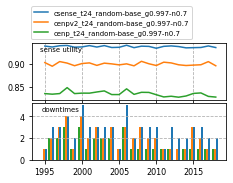

In [13]:
single_column_figure_width = 3.487
double_column_figure_width = 7

fig_width = single_column_figure_width
fig_height = fig_width / 1.618

fig, axs = plt.subplots(nrows=2,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)

#######################################################################################
# # left  = 0.125  # the left side of the subplots of the figure
# # right = 0.9    # the right side of the subplots of the figure
# # bottom = 0.1   # the bottom of the subplots of the figure
# # top = 0.9      # the top of the subplots of the figure
# # wspace = 0.2   # the amount of width reserved for blank space between subplots
# # hspace = 0.2   # the amount of height reserved for white space between subplots
#######################################################################################

sense_reward_ax  = axs[0]
downtimes_ax = axs[1]

location = 'tokyo'
print(location, ':', seed_no)

# avg_sense_reward
for experiment in experiment_list:
    data = [results[experiment][seed_no][location][year]['sense_reward_log'].mean() for year in year_list]
    sense_reward_ax.plot(year_list, data, label=experiment)
    
sense_reward_ax.text(0.15,0.85, 'sense utility', 
         size='x-small', ha="center", 
         transform=sense_reward_ax.transAxes)
# sense_reward_ax.set_title('sense utility')
# sense_reward_ax.set_ylabel('sense utility')    
sense_reward_ax.legend(loc="lower left",
                       ncol=1,
                       fontsize='x-small',
                       bbox_to_anchor=(-0.02,1,1,1))
sense_reward_ax.grid(which='major', axis='x', linestyle='--')

# Downtimes
for experiment in experiment_list:
    data = [results[experiment][seed_no][location][year]['downtimes'] for year in year_list]

    width = 0.8/len(experiment_list)  # the width of the bars 
    xroot = np.array(year_list) # label locations
    xoffset = 0.8/2 - experiment_list.index(experiment) 
    downtimes_ax.bar(xroot+xoffset*width, data,width,
                     label=experiment,
                     error_kw=dict(ecolor='black', lw=1, capsize=0.5, capthick=width*0.5, alpha=0.2))

downtimes_ax.set_xticks(year_list[::5])
downtimes_ax.set_xticklabels(year_list[::5], rotation=0)

downtimes_ax.text(0.15,0.85, 'downtimes', 
                 size='x-small', ha="center", 
                 transform=downtimes_ax.transAxes)
# downtimes_ax.set_title('downtimes')
# downtimes_ax.set_ylabel('downtimes')    
# downtimes_ax.legend(loc="lower left",
#                    ncol=1,
#                    bbox_to_anchor=(0,0.8,1,1))
downtimes_ax.grid(which='major', axis='y', linestyle='--')
# fig.savefig('/figures/figure.png', dpi=300, bbox_inches='tight', transparent=True)